## Student Info

* Student name: Trương Tiến Anh
* Student ID: 22120017

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID.ipynb` (e.g. `21120123.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [18]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
# 1
### Description: data loading and categorization (if any)

def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train)
    
    : training numpy array if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array if split = True
    """

    # YOUR CODE HERE
    global feature_names, target_values
    data = pd.read_csv(file_path, sep="\t")
    features = data.iloc[:, :-1].values  
    labels = data.iloc[:, -1].values 
    feature_names = data.columns.to_numpy()
    target_values, labels = np.unique(data.iloc[:, -1], return_inverse=True)

    if split:
        X_train, X_test, y_train, y_test = train_test_split(
            features, labels, test_size=0.2, random_state=42
        )
        return X_train, y_train, X_test, y_test

    return features, labels

In [20]:
# 4

# Decision Tree class
# You should implement the ID3 algorithm here
# You can add other utility methods to make your code easy to read :) 

class DecisionTree:
    def __init__(self, value='root', features=None, split_feature=None):
        # YOUR CODE HERE
        self.value = value  # Giá trị chia nhánh (ví dụ: 'sunny')
        self.features = features  # Danh sách các thuộc tính còn lại
        self.split_feature = split_feature  # Tên thuộc tính được chọn để chia nhánh
        self.children = []  # Danh sách các nút con

    def fit(self, X_train, y_train):
        # 3
        # YOUR CODE HERE
        num_samples, num_features = X_train.shape

        if self.value == 'root':
            self.features = feature_names.copy()

        # Điều kiện dừng: nếu không còn thuộc tính nào hoặc dữ liệu đã đồng nhất
        if num_features == 0 or len(set(y_train)) == 1:
            majority = np.bincount(y_train).argmax()
            label = target_values[majority]
            self.children = [DecisionTree(value=label, split_feature='label')]
            return

        best_attr_index, value_indices, label_counts, attr_name = self.select_best_attribute(X_train, y_train)
        self.create_branches(X_train, y_train, best_attr_index, value_indices, label_counts, attr_name)

    def predict(self, X_test):
        # 0.5
        # YOUR CODE HERE
        predictions = np.zeros(X_test.shape[0], dtype=int)
        for i, sample in enumerate(X_test):
            sample_dict = {attr: val for attr, val in zip(self.features, sample)}
            predictions[i] = self.traverse(sample_dict)
        return predictions

    def visualize(self, indent='', is_last=True):
        # 0.5
        # YOUR CODE HERE
        prefix = indent + ('|-- ' if is_last else '|-- ')
    
        if self.split_feature == 'label':
            print(prefix + f'label = {self.value}')
        else:
            print(prefix + f'{self.split_feature} = {self.value}' if self.value != 'root' else 'root')

        new_indent = indent + ('    ' if is_last else '|   ')
        
        for i, child in enumerate(self.children):
            is_last_child = (i == len(self.children) - 1)
            child.visualize(new_indent, is_last_child)

    #-----------------  utility methods ----------------------
    def select_best_attribute(self, X, y):
        n_samples, n_features = X.shape
        attr_info = [{v: [0, 0] for v in np.unique(X[:, i])} for i in range(n_features)]
        index_by_value = [{v: [] for v in np.unique(X[:, i])} for i in range(n_features)]

        for i in range(n_samples):
            label = y[i]
            for j, val in enumerate(X[i]):
                attr_info[j][val][label] += 1
                index_by_value[j][val].append(i)

        def info_gain(attr_count):
            return sum(sum(c) * self.entropy(c) for c in attr_count.values())

        best_idx = min(range(n_features), key=lambda i: info_gain(attr_info[i]))
        return best_idx, index_by_value[best_idx], attr_info[best_idx], self.features[best_idx]


    def entropy(self, counts):
        total = sum(counts)
        if total == 0:
            return 0
        probs = [c / total for c in counts if c > 0]
        return -sum(p * np.log2(p) for p in probs)


    def create_branches(self, X, y, attr_idx, value_indices, label_counts, attr_name):
        X_new = np.delete(X, attr_idx, axis=1)
        new_features = np.delete(self.features, attr_idx)

        for val, indices in value_indices.items():
            child = DecisionTree(value=val, features=new_features, split_feature=attr_name)
            if label_counts[val][0] == 0:
                child.children = [DecisionTree(value=target_values[1], split_feature='label')]
            elif label_counts[val][1] == 0:
                child.children = [DecisionTree(value=target_values[0], split_feature='label')]
            else:
                child.fit(X_new[indices], y[indices])
            self.children.append(child)


    def traverse(self, sample_dict):
        for child in self.children:
            if child.split_feature not in sample_dict:
                return int(child.value == target_values[1])
            if sample_dict[child.split_feature] == child.value:
                return child.traverse(sample_dict)
        # Trường hợp không khớp: random fallback (hoặc có thể dùng majority vote)
        fallback = np.random.choice(self.children)
        return int(fallback.value == target_values[1])

In [21]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 1 (create one cell for each dataset with the following content)

tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/tennis.txt")
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_test, y_hat_test)
tree.visualize()

root
    |-- outlook = overcast
    |   |-- label = yes
    |-- outlook = rain
    |   |-- wind = strong
    |   |   |-- label = no
    |   |-- wind = weak
    |       |-- label = yes
    |-- outlook = sunny
        |-- humidity = high
        |   |-- label = no
        |-- humidity = normal
            |-- label = yes


In [22]:
# dataset 2: titanic
tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/titanic2.txt")
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_test, y_hat_test)
tree.visualize()
print('Accuracy train:', acc_train)
print('Accuracy test:', acc_test)

root
    |-- sex = female
    |   |-- pclass = 1st
    |   |   |-- age = adult
    |   |       |-- label = yes
    |   |-- pclass = 2nd
    |   |   |-- age = adult
    |   |   |   |-- label = yes
    |   |   |-- age = child
    |   |       |-- label = yes
    |   |-- pclass = 3rd
    |   |   |-- age = adult
    |   |   |   |-- label = no
    |   |   |-- age = child
    |   |       |-- label = no
    |   |-- pclass = crew
    |       |-- age = adult
    |           |-- label = yes
    |-- sex = male
        |-- pclass = 1st
        |   |-- age = adult
        |   |   |-- label = no
        |   |-- age = child
        |       |-- label = yes
        |-- pclass = 2nd
        |   |-- age = adult
        |   |   |-- label = no
        |   |-- age = child
        |       |-- label = yes
        |-- pclass = 3rd
        |   |-- age = adult
        |   |   |-- label = no
        |   |-- age = child
        |       |-- label = no
        |-- pclass = crew
            |-- age = adult
           

### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution

---

*Your answer here*

**Nhận xét**
- Accuracy trên tập huấn luyện (train): 79.26%

- Accuracy trên tập kiểm tra (test): 78.00%

Độ chính xác giữa hai tập dữ liệu này gần bằng nhau, cho thấy mô hình đang học tốt và tổng quát hóa ổn định. Mô hình không bị overfitting (quá khớp) vì độ chính xác trên tập train không quá cao so với tập test. Đồng thời cũng không underfitting vì độ chính xác không quá thấp.

**Giải thích**
- Tổng quát hóa tốt: Độ chính xác train và test gần nhau cho thấy mô hình học được quy luật thực sự trong dữ liệu chứ không chỉ "học vẹt" theo dữ liệu huấn luyện.
- Accuracy chỉ đạt khoảng 78–79%, chưa thật sự cao. Điều này cho thấy mô hình có thể chưa khai thác tối đa thông tin từ dữ liệu.

**Hướng đề xuất cải thiện**
-  Feature Engineering (Xây dựng đặc trưng):
   - Tạo thêm các đặc trưng mới từ dữ liệu hiện có, ví dụ: gộp `sex` và `pclass` để tạo ra đặc trưng xã hội học.

   - Chuyển cột `age` thành các nhóm tuổi như `trẻ em`, `người lớn`, `người già`.

- Điều chỉnh siêu tham số (Hyperparameter Tuning):

   - Độ sâu tối đa của cây (max_depth)
 
   - Số mẫu tối thiểu ở mỗi node lá (min_samples_leaf)

   - Hoặc dùng GridSearchCV để tự động tìm tham số tối ưu.

- Thử mô hình phức tạp hơn:

   - Thay vì chỉ dùng một cây quyết định, có thể thử Random Forest hoặc Gradient Boosting, vốn cho kết quả tốt hơn trong nhiều bài toán phân loại.

- Cross-validation (Xác thực chéo):

   - Dùng kỹ thuật K-fold cross-validation để kiểm tra mức ổn định của mô hình trên nhiều tập con khác nhau, giúp đánh giá chính xác hơn.

- Xử lý mất cân bằng dữ liệu (nếu có):

  - Nếu nhãn phân loại bị lệch (ví dụ: nhiều người không sống sót hơn sống sót), có thể dùng oversampling (như SMOTE) hoặc undersampling để cân bằng tập dữ liệu.

## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [24]:
seed = 520 # for reproducibility

In [25]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

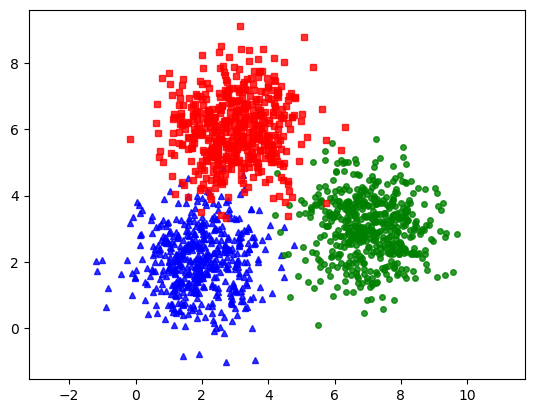

In [26]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [27]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)

    # randomly pick k rows of X as initial centers using np.random.choice function
    
    # YOUR CODE HERE
    index = np.random.choice(X.shape[0], k, replace=True)
    return X[index]

In [28]:
centers = kmeans_init_centers(X, K)
print(centers)
assert centers.shape == (K, 2)

[[5.59766573 3.69475944]
 [1.92326412 0.50900007]
 [6.4739196  2.17442223]]


In [29]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin

    # YOUR CODE HERE
    distances = cdist(X, centers)
    labels = np.argmin(distances, axis=1)
    # print(distances)
    # print(labels)

    return labels

In [30]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [31]:
# 1
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average

        # YOUR CODE HERE
        cluster = X[labels == k]
        if len(cluster) > 0:
            centers[k] = np.mean(cluster, axis=0)
        
    return centers



In [32]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same

    # YOUR CODE HERE
    if np.all(centers == new_centers):
        return True
    return False

In [33]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 

        # YOUR CODE HERE   
        new_labels = kmeans_assign_labels(X, centers[-1])
        labels.append(new_labels)

        new_centers = kmeans_update_centers(X, new_labels, K)

        if has_converged(centers[-1], new_centers):
            break

        centers.append(new_centers)
        it += 1
    
    return (centers, labels, it)

Centers found by k-means algorithm:
[[2.96323088 6.00698444]
 [1.91937508 2.02798091]
 [7.03594941 3.05108601]]


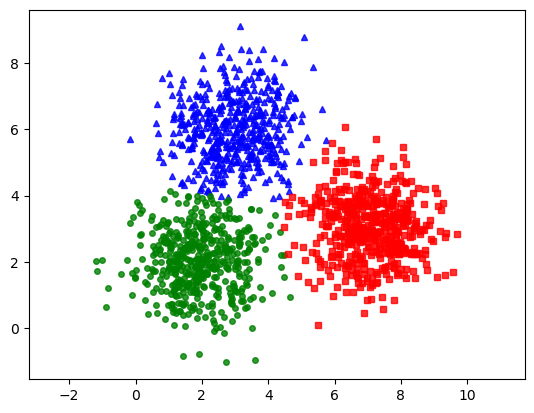

In [34]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])
print('='*60)

kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

---

*Your answer here*

- Dữ liệu sau khi sử dụng thuật toán K-means đã được phân cụm khá tốt. Các điểm dữ liệu đã được chia thành 3 nhóm riêng biệt, mỗi nhóm có hình dạng cụm tròn rõ ràng và tương ứng với một cụm màu riêng biệt (xanh lá, đỏ, xanh dương).

- Không có sự chồng lấn đáng kể giữa các cụm, điều này cho thấy K-means hoạt động hiệu quả trên tập dữ liệu tổng hợp (synthetic dataset) này.

- Tuy nhiên, thuật toán này hoạt động tốt trong trường hợp dữ liệu có cấu trúc phân cụm rõ ràng và khoảng cách giữa các cụm tương đối xa. Trong các trường hợp dữ liệu phức tạp hơn (không có hình tròn, chồng chéo nhiều), K-means có thể không đạt hiệu quả tương tự.

- Kết quả trên minh chứng rằng K-means có thể được sử dụng tốt trong các bài toán phân cụm cơ bản, đặc biệt khi số lượng cụm được xác định trước và dữ liệu có dạng phân bố Gaussian rõ ràng.




**Question 3:** 

- Drawbacks of K-means clustering algorithm (0.5)

- Propose solutions to the drawbacks you stated above (0.25)

---

*Your answer here*

| **Drawbacks of K-means**                                     | **Proposed Solutions**                                                                 |
|--------------------------------------------------------------|----------------------------------------------------------------------------------------|
| Cần biết trước số lượng cụm K                                 | Sử dụng Elbow method, Silhouette score, hoặc Gap statistic để chọn K tối ưu            |
| Nhạy cảm với điểm nhiễu và ngoại lệ                           | Loại bỏ outliers trước khi phân cụm hoặc dùng thuật toán như DBSCAN                    |
| Không hoạt động tốt với cụm có hình dạng phức tạp             | Dùng DBSCAN, Mean Shift hoặc Spectral Clustering phù hợp hơn với cụm không hình cầu     |
| Có thể hội tụ đến nghiệm cục bộ (do khởi tạo centroid ngẫu nhiên) | Dùng K-means++ để khởi tạo centroid một cách thông minh hơn                            |
